In [1]:
#Honda_API Analysis: Yin Yin Teo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Set API Parameters Here
import requests
import requests
import bs4 as bs
import pandas as pd

token = 'This is not public.'
api_url = 'This is also not public.'

headers={'Authorization': 'Bearer %s' % token}

In [4]:
#triprequests ------------
query = {"query" : "{triprequest(input:{next:{fetch:10000}}){id scheduled_ts pickup_ts pickup_address dropoff_ts dropoff_address requested_ts created_by special_assistance organization_id ride_type status estimated_miles fare discount route_id updated_at}}"} 

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('triprequest')
new_dict2
triprequest = pd.DataFrame(new_dict2)
triprequest

,id,scheduled_ts,pickup_ts,pickup_address,dropoff_ts,dropoff_address,requested_ts,created_by,special_assistance,organization_id,ride_type,status,estimated_miles,fare,discount,route_id,updated_at
0,286014,2019-09-14T11:35:00Z,2019-09-14T11:36:46Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T11:59:36Z,"1356 Cherry Way Drive, Gahanna, OH, USA",2019-09-03T19:59:43Z,589,false,22,Ready By,Completed,11.8,14.00,0.00,39152.0,2019-09-14T11:59:36Z
1,286015,2019-09-14T14:30:00Z,2019-09-14T16:16:39Z,"1356 Cherry Way Dr, Gahanna, OH 43230, USA",2019-09-14T16:16:53Z,"50 North 3rd Street, Columbus, OH, USA",2019-09-03T20:00:32Z,589,false,22,Ready By,Completed,11.1,14.00,0.00,39154.0,2019-09-14T16:16:53Z
2,286016,2019-09-14T16:00:00Z,2019-09-14T15:07:03Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T16:22:17Z,"1420 Grandview Avenue, Columbus, OH, USA",2019-09-03T20:01:56Z,589,false,22,Ready By,Completed,4.0,8.00,0.00,39159.0,2019-09-14T16:22:17Z
3,286017,2019-09-14T16:20:00Z,2019-09-14T16:44:07Z,"1403 Chesapeake Avenue, Columbus, OH, USA",2019-09-14T16:51:03Z,"1420 Grandview Ave, Columbus, OH 43212, USA",2019-09-03T20:03:50Z,589,false,22,Ready By,Completed,0.9,8.00,0.00,39158.0,2019-09-14T16:51:03Z
4,287251,2019-09-16T14:30:00Z,2019-09-16T14:43:51Z,"30147 Detroit Rd, Westlake, OH 44145, USA",2019-09-16T14:48:51Z,"31001 Clemens Rd, Westlake, OH 44145, USA",2019-09-07T20:14:33Z,14814,false,70,Ready By,Completed,1.5,6.79,1.22,40639.0,2019-09-16T14:48:51Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,438540,2020-09-23T10:00:00Z,2020-09-23T10:15:37Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-23T10:15:37Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Ready By,No Show,3.9,11.07,1.11,70063.0,2020-09-23T10:15:37Z
4995,438541,2020-09-24T10:00:00Z,2020-09-24T10:07:23Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-24T10:26:45Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Ready By,Completed,3.9,11.07,1.11,70181.0,2020-09-24T10:26:45Z
4996,438542,2020-09-25T10:00:00Z,2020-09-25T10:06:28Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-25T10:25:40Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Ready By,Completed,3.9,11.07,1.11,70139.0,2020-09-25T10:25:40Z
4997,438556,2020-09-23T21:15:00Z,2020-09-23T21:18:22Z,"844 Bryden Rd, Columbus, OH 43205, USA",2020-09-23T21:29:33Z,"2141 Fairwood Avenue, Columbus, OH, USA",2020-09-23T00:09:19Z,685,false,97,Ready By,Completed,3.0,14.00,0.00,70180.0,2020-09-23T21:29:33Z


In [5]:
triprequest.isna().any() #route_id contains na
nulls = triprequest[triprequest['route_id'].isnull()]
nulls
triprequest = triprequest.dropna()
triprequest.describe()
#1999 rows of data
#stats helpful for estiamted miles, fare, and discount columns only

,id,created_by,organization_id,estimated_miles,fare,discount,route_id
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,364221.670206,7760.490483,70.435384,3.645221,8.868882,0.980539,58496.534161
std,47898.734188,7127.305861,18.480119,5.064076,4.102960,0.590105,8189.293664
min,286014.000000,51.000000,9.000000,0.000000,0.000000,0.000000,39152.000000
25%,325828.000000,641.000000,70.000000,0.300000,5.440000,1.090000,51779.000000
50%,348991.000000,4306.000000,75.000000,1.400000,8.230000,1.090000,59606.000000
75%,416651.500000,15428.000000,75.000000,5.400000,11.070000,1.230000,66373.000000
max,438557.000000,17039.000000,97.000000,31.800000,35.150000,3.000000,70195.000000


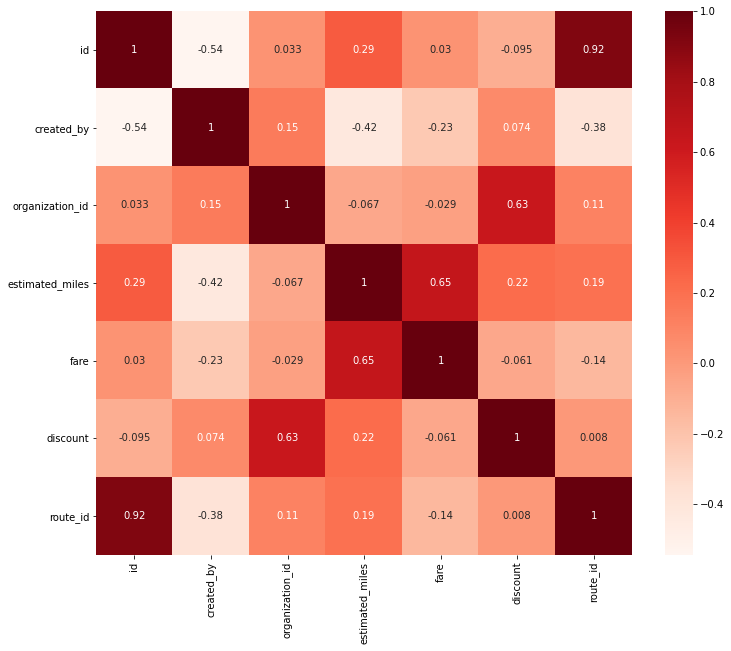

In [6]:
#plt correlation
plt.figure(figsize=(12,10))
cor = triprequest.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#print "high" correlations
print(triprequest[["estimated_miles","fare"]].corr())

                 estimated_miles      fare
estimated_miles         1.000000  0.651291
fare                    0.651291  1.000000


In [8]:
#organization ------------
query = {"query" : "{organization(input:{next:{fetch:10000}}){organization_id type pricing_mode}}"} 

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('organization')
new_dict2
organization = pd.DataFrame(new_dict2)
organization

,organization_id,type,pricing_mode
0,1,Other,Rider Paid
1,2,Senior,Organization Paid
2,8,Student,Organization Paid
3,9,Student,Organization Paid
4,12,Other,Rider Paid
5,13,Student,Split Payment
6,14,Student,Split Payment
7,17,Workforce,Organization Paid
8,20,Student,Organization Paid
9,21,Workforce,Organization Paid


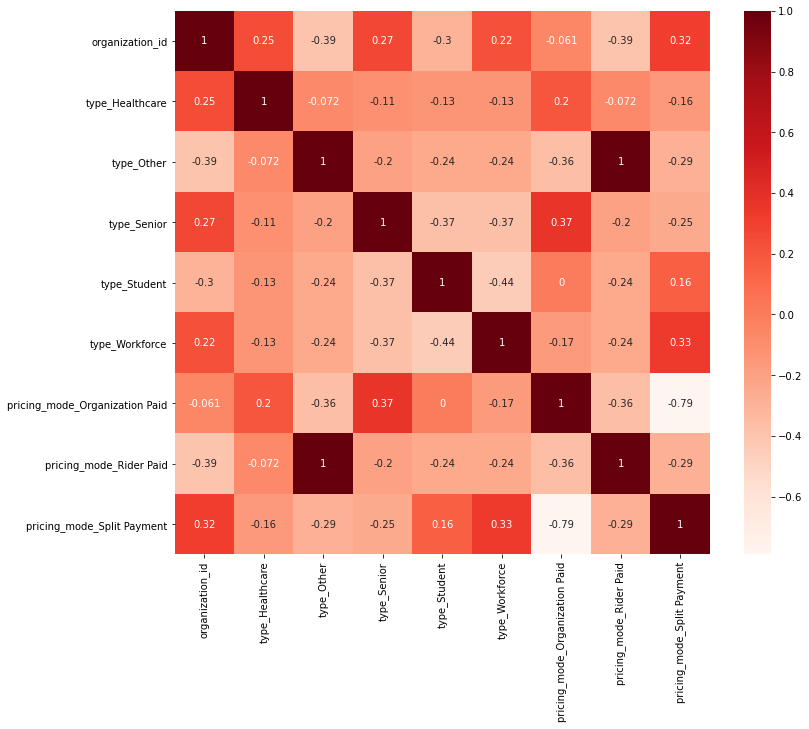

In [9]:
#features are categorical/nominal so get dummy variables
organization.isna().any() #no na's
organization_d = pd.get_dummies(organization, columns=['type','pricing_mode'])
organization_d

#plt correlation
plt.figure(figsize=(12,10))
cor = organization_d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#print "high" correlations
print(organization_d[["type_Other","pricing_mode_Rider Paid"]].corr())
print(organization_d[["type_Senior", "pricing_mode_Organization Paid"]].corr())
print(organization_d[["type_Other","pricing_mode_Organization Paid"]].corr())

                         type_Other  pricing_mode_Rider Paid
type_Other                      1.0                      1.0
pricing_mode_Rider Paid         1.0                      1.0
                                type_Senior  pricing_mode_Organization Paid
type_Senior                        1.000000                        0.365148
pricing_mode_Organization Paid     0.365148                        1.000000
                                type_Other  pricing_mode_Organization Paid
type_Other                        1.000000                       -0.361158
pricing_mode_Organization Paid   -0.361158                        1.000000


In [11]:
#harshevent ---------
query = {"query" : "{harshevent(input:{next:{fetch:2000}}){id route_id event_datetime event_type address distracted incident_url created_datetime updated_at}}"} 

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('harshevent')
new_dict2
harshevent = pd.DataFrame(new_dict2)
harshevent


,id,route_id,event_datetime,event_type,address,distracted,incident_url,created_datetime,updated_at
0,112,39668,2019-09-09T11:55:21Z,Harsh Braking,Olentangy Freeway; Moody Jackson Parkway (SR 3...,false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-10T09:00:25Z,2019-09-10T09:00:25Z
1,113,40032,2019-09-11T22:43:10Z,Rolling Stop,"Sancus PTC Entrance, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-12T09:00:11Z,2019-09-12T09:00:11Z
2,114,40235,2019-09-12T20:20:01Z,Harsh Braking,"Olentangy Freeway, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-13T09:00:29Z,2019-09-13T09:00:29Z
3,115,40547,2019-09-17T11:07:15Z,Harsh Braking,"Hamilton Road, Whitehall, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-18T09:00:59Z,2019-09-18T09:00:59Z
4,116,41175,2019-09-19T12:06:17Z,Harsh Event,"Main Street, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-20T09:00:34Z,2019-09-20T09:00:34Z
...,...,...,...,...,...,...,...,...,...
66,178,65950,2020-03-13T10:26:10Z,Harsh Turn,"I 71, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2020-03-14T09:00:14Z,2020-03-14T09:00:14Z
67,179,70603,2020-10-12T16:16:27Z,Harsh Event,"4000 Dumfries Court, Columbus, OH",false,https://cloud.samsara.com/o/17693/fleet/report...,2020-10-19T04:07:54Z,2020-10-19T04:07:54Z
68,180,70601,2020-10-12T15:28:01Z,Harsh Braking,"Muirfield Drive, Dublin, OH",false,https://cloud.samsara.com/o/17693/fleet/report...,2020-10-19T04:07:55Z,2020-10-19T04:07:55Z
69,181,70601,2020-10-12T15:28:26Z,Harsh Acceleration,"6400 Moors Place West, Dublin, OH",false,https://cloud.samsara.com/o/17693/fleet/report...,2020-10-19T04:07:55Z,2020-10-19T04:07:55Z


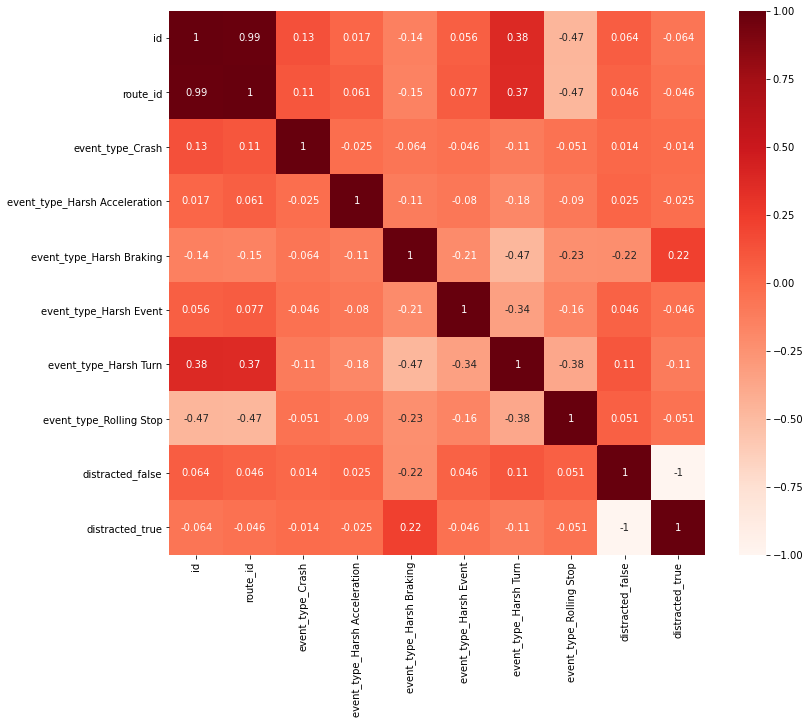

In [12]:
harshevent.isna().any() #no na's

#mix of categorical(get dummy variables) and numerical values
harshevent_d = pd.get_dummies(harshevent, columns=['event_type','distracted'])
harshevent_d

#plt correlation
plt.figure(figsize=(12,10))
cor = harshevent_d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#print "high" correlations
print(harshevent_d[["distracted_true", "event_type_Harsh Braking"]].corr())
print(harshevent_d[["distracted_false", "event_type_Harsh Turn"]].corr())
print(harshevent_d[["distracted_false", "event_type_Rolling Stop"]].corr())

                          distracted_true  event_type_Harsh Braking
distracted_true                  1.000000                  0.221601
event_type_Harsh Braking         0.221601                  1.000000
                       distracted_false  event_type_Harsh Turn
distracted_false               1.000000               0.105221
event_type_Harsh Turn          0.105221               1.000000
                         distracted_false  event_type_Rolling Stop
distracted_false                 1.000000                 0.051177
event_type_Rolling Stop          0.051177                 1.000000


In [14]:
#vehicle---------------
query = {"query" : "{vehicle(input:{next:{fetch:10000}}){id vin name make model year capacity handicapped updated_at}}"} 

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('vehicle')
new_dict2
vehicle = pd.DataFrame(new_dict2)
vehicle

,id,vin,name,make,model,year,capacity,handicapped,updated_at
0,1,2F***************,01-H-0004,Ford,Flex,2018,6,0,2019-10-30T09:53:29Z
1,2,WD***************,01-A-0016,Mercedes,Metris,2018,7,0,2019-10-23T19:01:38Z
2,5,5F***************,01-A-0002,Honda,Odyssey,2018,7,0,2020-07-17T18:42:09Z
3,8,5F***************,02-A-0007,Honda,Odyssey,2011,7,0,2019-11-15T19:11:00Z
4,9,1F***************,01-E-0001,Ford,,2018,6,0,2019-11-25T17:10:43Z
...,...,...,...,...,...,...,...,...,...
112,176,12***************,2152A,Ford,Bus,2019,24,12,2020-09-16T19:41:21Z
113,177,1f***************,245A,fort,tranist,2019,24,12,2020-09-16T19:41:30Z
114,178,1f***************,c001,ford,transit,2018,14,2,2020-09-16T15:35:15Z
115,179,1f***************,001,Ford,Transit,2018,14,2,2020-09-16T17:18:59Z


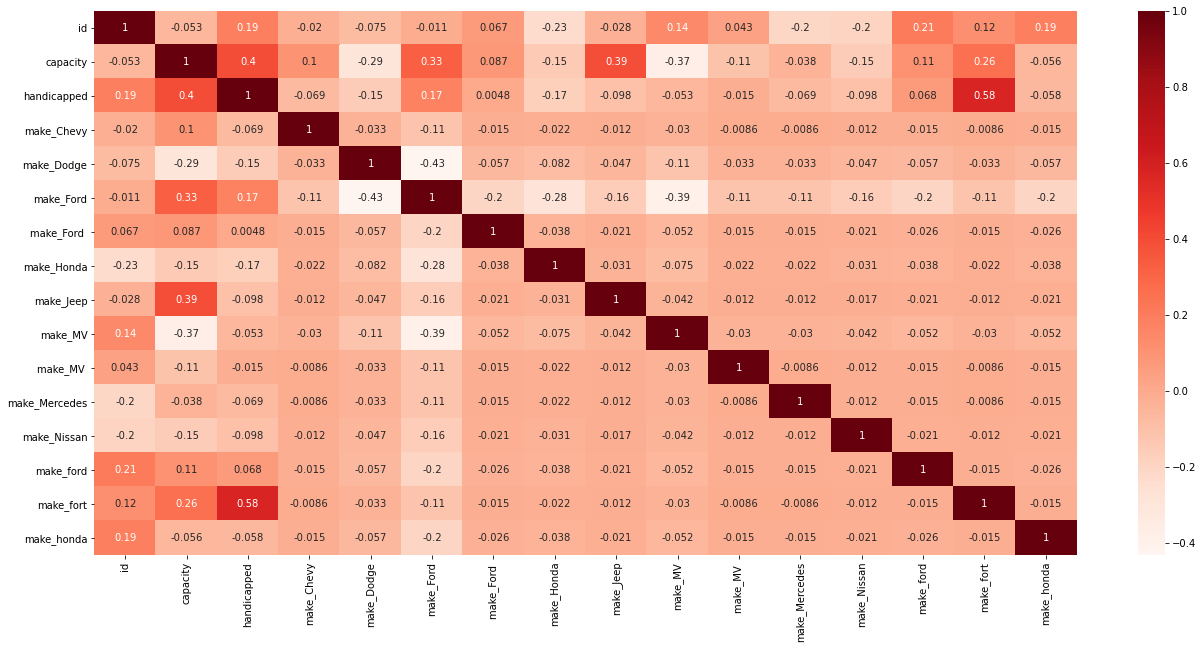

In [15]:
vehicle.isna().any() #no na's

#mix of categorical and numerical data
vehicle_d = pd.get_dummies(vehicle, columns=['make']) #try make first
vehicle_d

#plt correlation
plt.figure(figsize=(22, 10))
cor = vehicle_d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
##print "high" correlations between capacity and handicapped
print(vehicle_d[["capacity", "handicapped"]].corr())

#print "high" correlations between capacity and make
print(vehicle_d[["capacity", "make_Ford"]].corr())
print(vehicle_d[["capacity", "make_Jeep"]].corr())
print(vehicle_d[["capacity", "make_Dodge"]].corr())
print(vehicle_d[["capacity", "make_MV"]].corr())

#print "high" correlations between handicapped and make
print(vehicle_d[["handicapped", "make_fort"]].corr()) #same?
print(vehicle_d[["handicapped", "make_Ford"]].corr()) #same?
print(vehicle_d[["handicapped", "make_Honda"]].corr())
print(vehicle_d[["handicapped", "make_Dodge"]].corr())

             capacity  handicapped
capacity     1.000000     0.397915
handicapped  0.397915     1.000000
           capacity  make_Ford
capacity   1.000000   0.325986
make_Ford  0.325986   1.000000
           capacity  make_Jeep
capacity   1.000000   0.393768
make_Jeep  0.393768   1.000000
            capacity  make_Dodge
capacity    1.000000   -0.292103
make_Dodge -0.292103    1.000000
          capacity   make_MV
capacity  1.000000 -0.373543
make_MV  -0.373543  1.000000
             handicapped  make_fort
handicapped     1.000000   0.577269
make_fort       0.577269   1.000000
             handicapped  make_Ford
handicapped     1.000000   0.174521
make_Ford       0.174521   1.000000
             handicapped  make_Honda
handicapped     1.000000   -0.172908
make_Honda     -0.172908    1.000000
             handicapped  make_Dodge
handicapped     1.000000   -0.152505
make_Dodge     -0.152505    1.000000


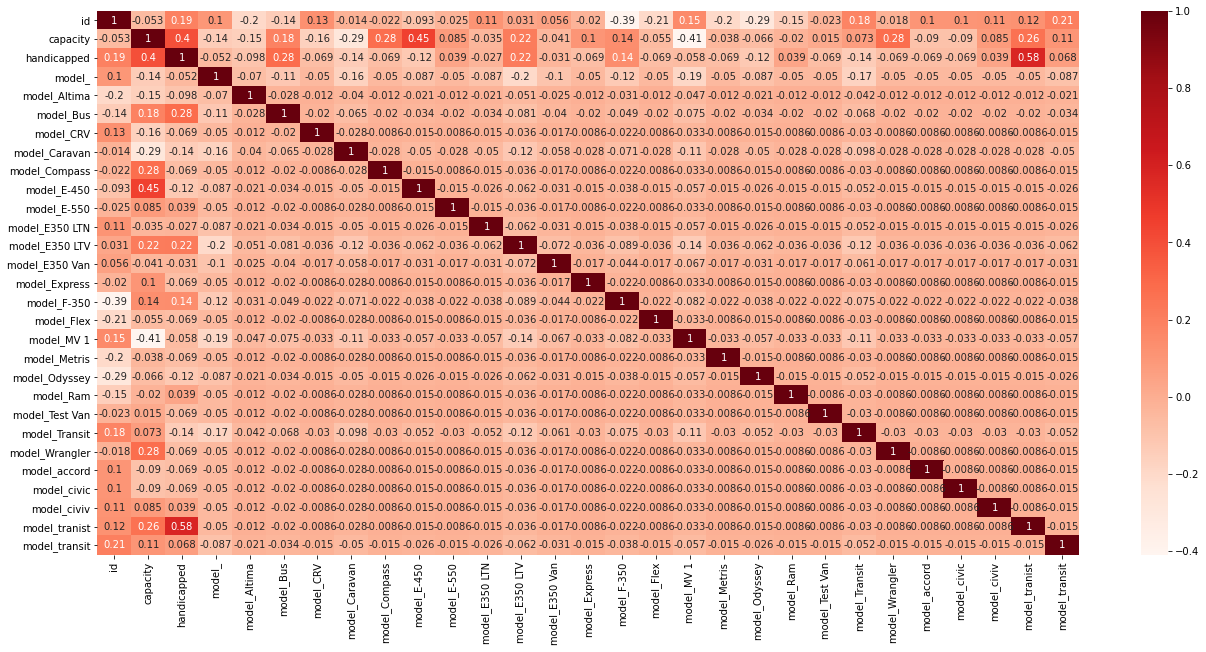

In [17]:
vehicle_dm = pd.get_dummies(vehicle, columns=['model']) #try model next
vehicle_dm

#plt correlation
plt.figure(figsize=(22, 10))
cor = vehicle_dm.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#print "high" correlations for capacity and model
print(vehicle_dm[["capacity", "model_tranist"]].corr()) #same as model_transit?
print(vehicle_dm[["capacity", "model_Wrangler"]].corr())
print(vehicle_dm[["capacity", "model_MV 1"]].corr())
print(vehicle_dm[["capacity", "model_E350 LTV"]].corr())
print(vehicle_dm[["capacity", "model_E-450"]].corr())
print(vehicle_dm[["capacity", "model_Compass"]].corr())
print(vehicle_dm[["capacity", "model_Caravan"]].corr())

#print "high" correlations for handicapped and model
print(vehicle_dm[["handicapped", "model_tranist"]].corr()) #same as model_transit?
print(vehicle_dm[["handicapped", "model_Bus"]].corr())
print(vehicle_dm[["handicapped", "model_E350 LTV"]].corr())

               capacity  model_tranist
capacity       1.000000       0.259738
model_tranist  0.259738       1.000000
                capacity  model_Wrangler
capacity        1.000000        0.277233
model_Wrangler  0.277233        1.000000
            capacity  model_MV 1
capacity     1.00000    -0.40997
model_MV 1  -0.40997     1.00000
                capacity  model_E350 LTV
capacity        1.000000        0.215297
model_E350 LTV  0.215297        1.000000
             capacity  model_E-450
capacity     1.000000     0.453808
model_E-450  0.453808     1.000000
               capacity  model_Compass
capacity       1.000000       0.277233
model_Compass  0.277233       1.000000
               capacity  model_Caravan
capacity       1.000000      -0.285365
model_Caravan -0.285365       1.000000
               handicapped  model_tranist
handicapped       1.000000       0.577269
model_tranist     0.577269       1.000000
             handicapped  model_Bus
handicapped     1.000000   0.284103
m

In [19]:
#------------------------------CHECK ON WHAT'S GOING ON WITH vehicle_id---------------------------------

In [20]:
#vehiclediagnostic
query = {"query" : "{vehiclediagnostic(input:{next:{fetch:10000}}){vehicle_id event_timestamp check_engine_light dtc_shortcode dtc_id dtc_id2 dtc_description}}"} 

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('vehiclediagnostic')
new_dict2
vehiclediagnostic = pd.DataFrame(new_dict2)
vehiclediagnostic

,vehicle_id,event_timestamp,check_engine_light,dtc_shortcode,dtc_id,dtc_id2,dtc_description
0,1,2018-12-06T00:54:13.573Z,False,None,None,None,None
1,1,2018-12-06T00:58:36.078Z,False,None,None,None,None
2,1,2018-12-06T01:02:32.244Z,False,None,None,None,None
3,1,2018-12-07T00:58:41.39Z,False,None,None,None,None
4,1,2018-12-07T01:31:18.057Z,False,None,None,None,None
...,...,...,...,...,...,...,...
9995,2,2019-05-01T19:01:05.096Z,False,None,None,None,None
9996,2,2019-05-01T20:01:04.426Z,False,None,None,None,None
9997,2,2019-05-01T21:01:03.97Z,False,None,None,None,None
9998,2,2019-05-01T22:01:04.417Z,False,None,None,None,None


In [21]:
vehiclediagnostic.isna().sum() #dtc_shortcode, dtc_id, dtc_description are all na.

#dropped columns with none
vehiclediagnostic_dropped = vehiclediagnostic.drop(columns = ['dtc_shortcode', 'dtc_id', 'dtc_id2', 'dtc_description'])
vehiclediagnostic_dropped



,vehicle_id,event_timestamp,check_engine_light
0,1,2018-12-06T00:54:13.573Z,False
1,1,2018-12-06T00:58:36.078Z,False
2,1,2018-12-06T01:02:32.244Z,False
3,1,2018-12-07T00:58:41.39Z,False
4,1,2018-12-07T01:31:18.057Z,False
...,...,...,...
9995,2,2019-05-01T19:01:05.096Z,False
9996,2,2019-05-01T20:01:04.426Z,False
9997,2,2019-05-01T21:01:03.97Z,False
9998,2,2019-05-01T22:01:04.417Z,False


In [22]:
#-------------------vehiclelocation WORKS, Tables joined for vehicle_id 1 and 2------------------------

In [23]:
#vehiclelocation1-------------
#change vehicle_id1
query = {"query" : "{vehiclelocation(input:{vehicle_id:1 next:{fetch:2000}}){vehicle_id lat lng speed_mph event_timestamp}}"}

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('vehiclelocation')
new_dict2
vehiclelocation1 = pd.DataFrame(new_dict2)
vehiclelocation1

#change vehicle_id2
query = {"query" : "{vehiclelocation(input:{vehicle_id:2 next:{fetch:2000}}){vehicle_id lat lng speed_mph event_timestamp}}"}

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('vehiclelocation')
new_dict2
vehiclelocation2 = pd.DataFrame(new_dict2)
vehiclelocation2

#FULL TABLE: append both tables: vehiclelocation1 & vehiclelocation2
vehiclelocation_m = vehiclelocation1.append(vehiclelocation2)
vehiclelocation_m

,vehicle_id,lat,lng,speed_mph,event_timestamp
0,1,40.062763,-83.000116,0.000000,2018-11-01T00:32:58.897Z
1,1,40.062763,-83.000116,0.000000,2018-11-01T01:36:04.904Z
2,1,40.062763,-83.000116,0.000000,2018-11-01T02:39:10.518Z
3,1,40.062763,-83.000116,0.000000,2018-11-01T03:42:16.9Z
4,1,40.062763,-83.000116,0.000000,2018-11-01T04:45:22.897Z
...,...,...,...,...,...
1995,2,39.878292,-82.999200,11.765569,2018-11-01T20:37:42.051Z
1996,2,39.878067,-82.999377,11.743704,2018-11-01T20:37:48.061Z
1997,2,39.877952,-82.999607,7.269474,2018-11-01T20:37:54.056Z
1998,2,39.877980,-82.999696,0.000000,2018-11-01T20:37:59.118Z


In [24]:
#------------^^^^^^^^^^ Good Idea to Plot map --> (Misha is working on this)

In [25]:
#-------------------safetydetail and route WORK NOW ------------------------

In [26]:
#safetydetail---------
query = {"query" : "{safetydetail(input:{next:{fetch:2000}}){safety_score safety_score_rank total_distance_driven total_time_driven}}"}
 
#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response

string_response
dictionary_response

new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('safetydetail')
new_dict2
safetydetail = pd.DataFrame(new_dict2)
safetydetail

,safety_score,safety_score_rank,total_distance_driven,total_time_driven
0,100,13,12.51,0001-01-01T00:56:00Z
1,100,14,12.71,0001-01-01T00:48:00Z
2,100,9,6.79,0001-01-01T00:26:00Z
3,100,12,6.79,0001-01-01T00:26:00Z
4,94,33,84.79,0001-01-01T02:14:00Z
...,...,...,...,...
1995,100,17,3.79,0001-01-01T00:11:00Z
1996,100,2,54.55,0001-01-01T02:27:00Z
1997,100,13,3.53,0001-01-01T00:10:00Z
1998,98,21,42.54,0001-01-01T01:21:00Z


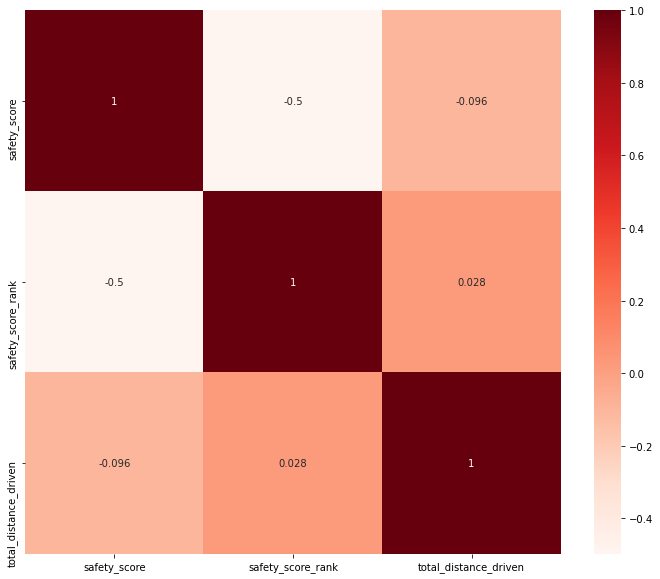

In [27]:
#plt correlation
plt.figure(figsize=(12, 10))
cor = safetydetail.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
#print "high" correlations for capacity and model
print(safetydetail[["safety_score", "safety_score_rank"]].corr()) #makes sense since rank starts from 1
#safety_score_rank: route safety and vehicle tech; safety_score: based on vehicle tech

print(safetydetail[["safety_score", "total_distance_driven"]].corr())

                   safety_score  safety_score_rank
safety_score           1.000000          -0.497808
safety_score_rank     -0.497808           1.000000
                       safety_score  total_distance_driven
safety_score               1.000000              -0.096235
total_distance_driven     -0.096235               1.000000


In [29]:
#route------------
query = {"query" : "{route(input:{next:{fetch:2000}}){id driver_id start_ts end_ts vehicle_id ambulatory_riders handicapped_riders total_riders status updated_at}}"} 

#route, triprequests, location of vehicle, merge tables together
r = requests.post(api_url, headers=headers, json=query)
# as a string
string_response = r.text

# as a dictionary
dictionary_response = r.json()
string_response
dictionary_response
new_dict = dictionary_response.get('data')
new_dict
new_dict2 = new_dict.get('route')
new_dict2
route = pd.DataFrame(new_dict2)
route

,id,driver_id,start_ts,end_ts,vehicle_id,ambulatory_riders,handicapped_riders,total_riders,status,updated_at
0,37593,1965,2019-08-22T10:38:56Z,2019-08-22T13:53:50Z,2.0,2,0,2,Completed,2019-09-16T15:18:23Z
1,38260,2401,2019-09-02T16:06:53Z,2019-09-03T00:51:00Z,2.0,1,0,1,Completed,2019-09-03T00:51:01Z
2,38262,21,2019-09-02T16:47:57Z,2019-09-02T20:41:04Z,2.0,1,0,1,Completed,2019-09-02T20:41:04Z
3,38512,23,2019-09-02T12:16:20Z,2019-09-02T18:04:00Z,2.0,1,0,1,Completed,2019-09-02T18:04:01Z
4,38524,2190,2019-09-30T15:41:48Z,2019-09-30T17:53:37Z,63.0,10,0,10,Completed,2019-09-30T17:53:38Z
...,...,...,...,...,...,...,...,...,...,...
1995,41895,2191,2019-09-24T18:18:49Z,2019-09-24T19:31:28Z,28.0,2,0,2,Completed,2019-09-24T19:31:28Z
1996,41896,1426,2019-09-23T20:05:23Z,2019-09-23T20:07:06Z,56.0,1,0,1,Completed,2019-09-24T09:00:02Z
1997,41897,1426,2019-09-23T20:12:24Z,2019-09-23T20:21:31Z,2.0,1,0,1,Completed,2019-09-24T09:00:01Z
1998,41898,2305,2019-09-24T11:20:09Z,2019-09-24T11:42:56Z,53.0,1,0,1,Completed,2019-09-26T09:00:46Z


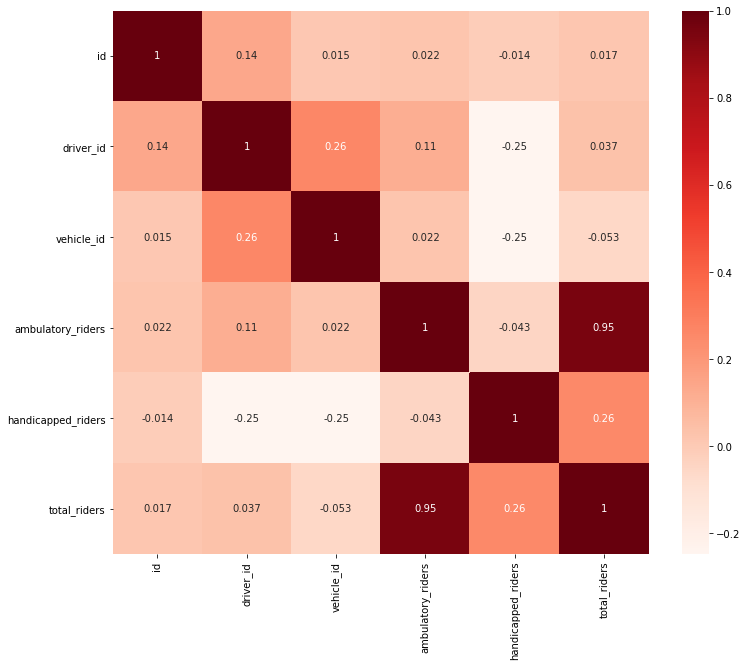

In [30]:
#look at the status column first
route.status.unique() #all routes were completed

#plt correlation
plt.figure(figsize=(12, 10))
cor = route.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
#print "high" correlations for capacity and model
print(route[["ambulatory_riders", "total_riders"]].corr())
print(route[["handicapped_riders", "total_riders"]].corr())

                   ambulatory_riders  total_riders
ambulatory_riders           1.000000      0.954167
total_riders                0.954167      1.000000
                    handicapped_riders  total_riders
handicapped_riders            1.000000      0.257728
total_riders                  0.257728      1.000000


In [32]:
#picking services and analysing requirements for these services
#planning fleet that optimizes cost per car (time, location, etc.)

In [35]:
#calculate distance and time
#use all locations for now (only focus on Ohio later)
medicine = pd.read_csv('Medical_dataset.csv') 
medicine

,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude
0,1165742,1705 S Braddock Ave,Pittsburgh,PA,15218,Braddock,PA,40.425717,-79.886557,40.412797,-79.876339
1,1165824,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328
4,1167060,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531
...,...,...,...,...,...,...,...,...,...,...,...
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963
108,1176890,3061 Kingsdale Center,Upper Arlington,OH,43221,Columbus,OH,40.019922,-83.058481,39.999582,-83.050842
109,1176913,318 Cedar Ave.,Pittsburgh,PA,15212,Pittsburgh,PA,40.451602,-79.999575,40.453635,-80.005503


In [36]:
medicine_oh = medicine.loc[medicine['State'] == 'OH']
medicine_oh

,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328
9,1167590,33382 WALKER RD,Avon Lake,OH,44012,Sheffield Lake,OH,41.494052,-82.044289,41.498972,-82.076675
12,1168036,33382 WALKER RD,Avon Lake,OH,44012,avon lake,OH,41.494052,-82.044289,41.501126,-82.058123
13,1168122,33382 WALKER RD,Avon Lake,OH,44012,Avon Lake,OH,41.494052,-82.044289,41.492146,-82.025425
...,...,...,...,...,...,...,...,...,...,...,...
104,1176185,484 E. Waterloo Rd.,Akron,OH,44319,Akron,OH,41.028446,-81.509237,41.041622,-81.512088
105,1176309,3235 Manchester Rd.,Akron,OH,44319,Akron,OH,41.012220,-81.552415,41.022920,-81.554994
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963
